# Exercise 0 : Import Libraries

In [279]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

# Exercise 1 : Read the Dataset

In [280]:
df = pd.read_csv('heart_disease.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


<img src='./meta.png' width="1000" height="600">


# Exercise 2 : Drop Unnamed: 0 column

In [281]:
df.drop('Unnamed: 0' , axis='columns',inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [283]:
df.shape


(303, 14)

In [284]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [285]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [286]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [287]:
df[['thal','ca']].isna().sum()

thal    0
ca      0
dtype: int64

In [288]:
df['thal'].duplicated().sum()
df['thal'].unique()
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [289]:
df[df['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


In [290]:
df.drop(df[df['thal']=='?'].index,inplace=True)

In [291]:
df['ca'].duplicated().sum()
df['ca'].unique()
df['ca'].value_counts()


ca
0.0    174
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [292]:
df[df['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [293]:
df.drop(df[df['ca']=='?'].index,inplace=True)

# Exercise 4 : Handle missing data

In [294]:
#Done above

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [295]:
df[['thal','ca']]=df[['thal','ca']].astype(float)





# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

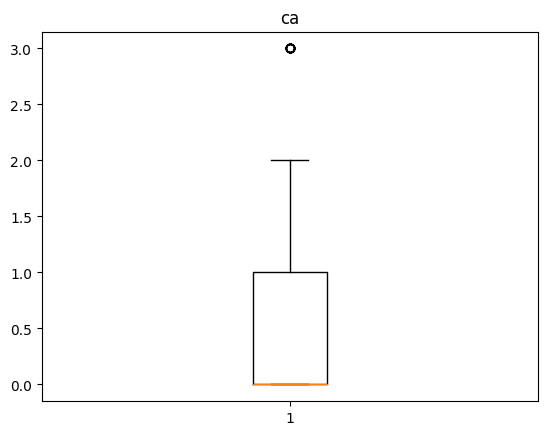

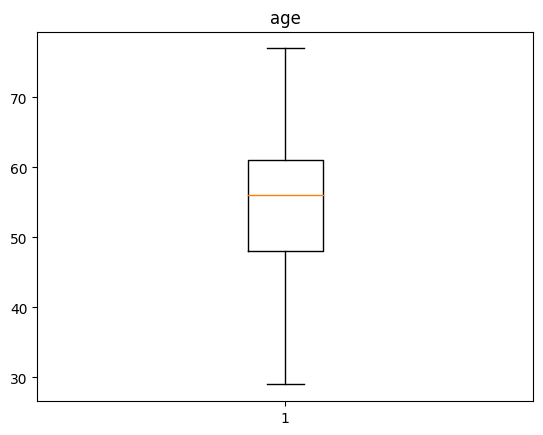

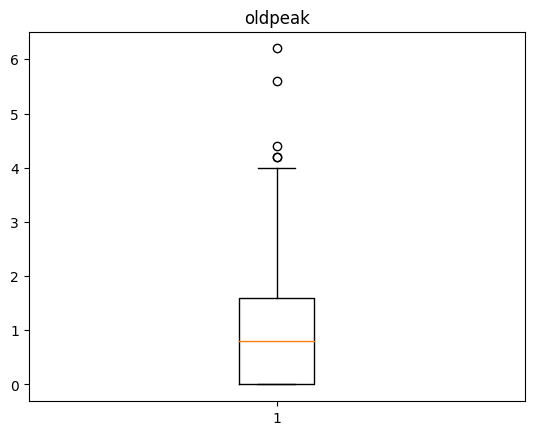

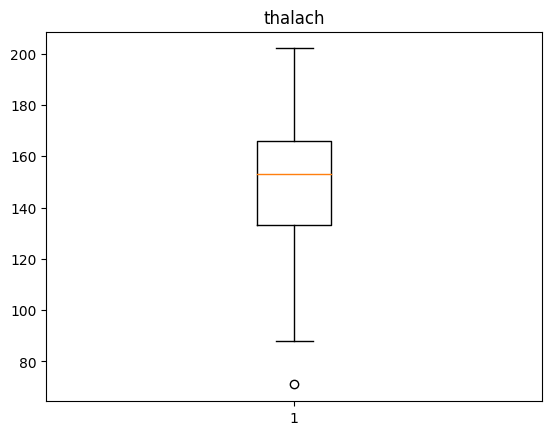

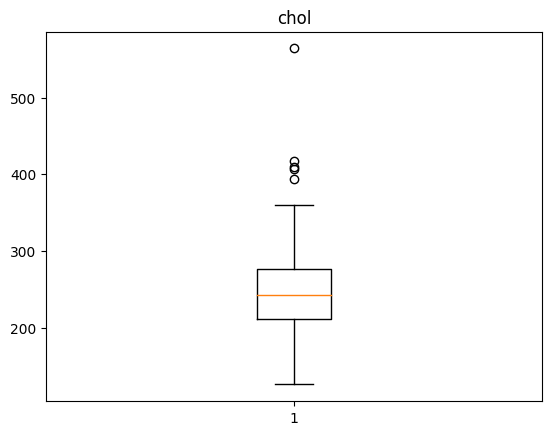

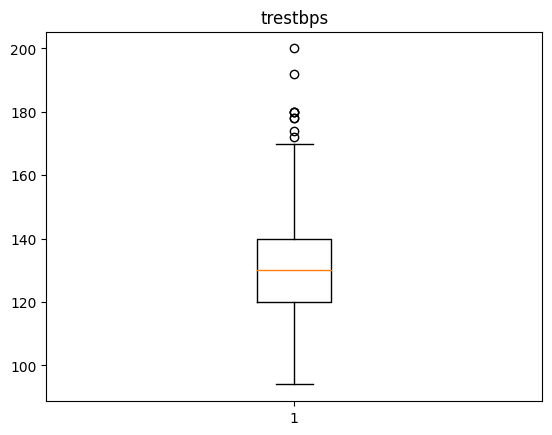

In [296]:
plt.boxplot(df['ca'])
plt.title("ca")
plt.show()

plt.boxplot(df['age'])
plt.title("age")
plt.show()

plt.boxplot(df['oldpeak'])
plt.title("oldpeak")
plt.show()

plt.boxplot(df['thalach'])
plt.title("thalach")
plt.show()

plt.boxplot(df['chol'])
plt.title("chol")
plt.show()

plt.boxplot(df['trestbps'])
plt.title("trestbps")
plt.show()

In [297]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['trestbps'] < Q1 - 1.5 * IQR) | (df['trestbps'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [298]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['chol'] < Q1 - 1.5 * IQR) | (df['chol'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [299]:
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['thalach'] < Q1 - 1.5 * IQR) | (df['thalach'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [300]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['oldpeak'] < Q1 - 1.5 * IQR) | (df['oldpeak'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

In [301]:
Q1 = df['ca'].quantile(0.25)
Q3 = df['ca'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['ca'] < Q1 - 1.5 * IQR) | (df['ca'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [302]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,-0.076849,0.082397,0.281696,0.136900,0.128259,0.128833,-0.401080,0.086047,0.193951,0.139811,0.382206,0.130802,0.203019
sex,-0.076849,1.000000,0.049204,-0.005939,-0.143219,0.060684,0.048066,-0.059646,0.176521,0.173442,0.066079,0.092794,0.425280,0.318181
cp,0.082397,0.049204,1.000000,-0.076646,0.027455,-0.100211,0.062946,-0.322208,0.380412,0.189069,0.136181,0.199479,0.294467,0.395657
trestbps,0.281696,-0.005939,-0.076646,1.000000,0.104613,0.134125,0.147997,-0.035767,-0.020298,0.147303,0.052813,0.050996,0.093082,0.096120
chol,0.136900,-0.143219,0.027455,0.104613,1.000000,-0.022718,0.107734,0.006659,0.046418,-0.030423,-0.060649,0.083072,-0.020353,0.087285
fbs,0.128259,0.060684,-0.100211,0.134125,-0.022718,1.000000,0.072335,-0.009725,-0.008143,0.025387,0.082663,0.115946,0.033594,0.000444
restecg,0.128833,0.048066,0.062946,0.147997,0.107734,0.072335,1.000000,-0.095445,0.100298,0.101448,0.136847,0.080386,0.000367,0.157026
thalach,-0.401080,-0.059646,-0.322208,-0.035767,0.006659,-0.009725,-0.095445,1.000000,-0.418979,-0.339635,-0.373754,-0.248350,-0.320096,-0.400693
exang,0.086047,0.176521,0.380412,-0.020298,0.046418,-0.008143,0.100298,-0.418979,1.000000,0.349822,0.267047,0.187421,0.362138,0.420759
oldpeak,0.193951,0.173442,0.189069,0.147303,-0.030423,0.025387,0.101448,-0.339635,0.349822,1.000000,0.528971,0.279112,0.326379,0.433331


In [303]:
corr = df.corr()
highly_correlated = ()

for i, row in corr.iterrows():
    for j in range(i):
        if abs(row[j]) > 0.6:
            colname = df.columns[i]
            colcompared = df.columns[j]
            highly_correlated.add((colname, colcompared))

# Display highly correlated feature pairs above the threshold
print(highly_correlated)

for i,j in corr.iterrows():
    print(j >= 0.6)

# Exercise 8 : X and Y split, then train and test split

In [304]:
# Putting feature variable to X
X = df.drop('present',axis=1)

# Putting response variable to y
y = df['present']

X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=42,  
                                   test_size=0.2) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 13), (53, 13), (209,), (53,))

# Exercise 9 : Train the model

In [305]:
from sklearn.linear_model import LogisticRegression


logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


print(logmodel.intercept_)
print(logmodel.coef_)

[-0.0624407]
[[-3.91909823e-02  6.50178636e-01  5.32996550e-01 -5.61156619e-03
   9.64992148e-04 -1.91669455e-01  2.52079853e-01 -2.88845108e-02
   7.20365875e-01  4.59503456e-01  3.69954576e-01  1.62067401e+00
   5.08580073e-01]]


# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [306]:

logmodel.score(X_train,y_train)


0.8755980861244019

Sensitivity= true positives/(true positive + false negative) <br>
Specificity=true negatives/(true negative + false positives)

In [307]:
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


y_pred = logmodel.predict(X_test)
print(y_pred)
print(f'The classification report :-\n{confusion_matrix(y_test, y_pred)}')

print(f'The accuracy of the model : {accuracy_score(y_test, y_pred)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred)}')

print(f'The precision of the model : {precision_score(y_test, y_pred)}')
print(f'The recall of the model : {recall_score(y_test, y_pred)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred)}')

print(f'The sensitivity score of the model : {29/(29+5)}')
print(f'The specifity score of the model : {15/(15+4)}')




[0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1]
The classification report :-
[[29  4]
 [ 5 15]]
The accuracy of the model : 0.8301886792452831
The AUC-ROC of the model : 0.8143939393939393
The precision of the model : 0.7894736842105263
The recall of the model : 0.75
The f1 score of the model : 0.7692307692307692
The sensitivity score of the model : 0.8529411764705882
The specifity score of the model : 0.7894736842105263


# Exercise 11 : Find the wights and y intercept

In [308]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-0.0624407]
[[-3.91909823e-02  6.50178636e-01  5.32996550e-01 -5.61156619e-03
   9.64992148e-04 -1.91669455e-01  2.52079853e-01 -2.88845108e-02
   7.20365875e-01  4.59503456e-01  3.69954576e-01  1.62067401e+00
   5.08580073e-01]]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

In [309]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet


## Ridge Regularization

In [310]:
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [311]:
model1 = Ridge(alpha=0.5) # Lambda
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(y_pred1)
threshold = 0.7  # You can adjust this threshold as needed
y_pred1 = [1 if prob >= threshold else 0 for prob in y_pred1]
print(y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'1st model MSE:{mse1}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred1)}')
print(f'The precision of the model : {precision_score(y_test, y_pred1)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred1)}')
print(f'The recall of the model : {recall_score(y_test, y_pred1)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred1)}')


[ 0.31032749  0.95776184  0.70816046  0.00525796  0.84699183  0.99718363
 -0.0052635   0.95423926  0.47154244 -0.01620838 -0.06008117 -0.23328784
  0.06083247  0.03111133  0.18941576  1.21201437  0.10222419  0.20507625
  0.65118397  1.2642124   0.89707728  0.39594505 -0.20508316  0.70723214
  0.2088553  -0.02327585  0.01231749  0.8395398   0.16182602  0.2021246
  0.07417336  0.08216482  0.42876445  0.99960288  0.13641045  0.1540885
  0.12060153  0.27167996 -0.06756102  0.08762895  0.14932535  0.29430354
  0.71294651  0.61419767  0.12380503  0.06440447  0.9254876   0.25848276
  0.7819448   1.04230785  0.60165339  0.41514374  1.07660557]
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
1st model MSE:0.18867924528301888
The accuracy of the model : 0.8113207547169812
The precision of the model : 0.8125
The AUC-ROC of the model : 0.7795454545454544
The recall of the model : 0.65
Th

In [312]:
model2 = Ridge(alpha=2) # Lambda
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(y_pred2)
threshold = 0.7  # You can adjust this threshold as needed
y_pred2 = [1 if prob >= threshold else 0 for prob in y_pred2]
print(y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'2nd model MSE:{mse2}')


print(f'The classification report :-\n{confusion_matrix(y_test, y_pred2)}')

print(f'The accuracy of the model : {accuracy_score(y_test, y_pred2)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred2)}')

print(f'The precision of the model : {precision_score(y_test, y_pred2)}')
print(f'The recall of the model : {recall_score(y_test, y_pred2)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred2)}')

[ 0.31257963  0.95153377  0.69962773  0.0069931   0.84305937  0.98887547
 -0.00561435  0.94941956  0.46997001 -0.01731128 -0.05641891 -0.22779237
  0.06182422  0.03499909  0.19007034  1.21059655  0.10004015  0.20591934
  0.64999053  1.25783887  0.890482    0.39220168 -0.19256593  0.70575337
  0.20855678 -0.02021734  0.01127695  0.83482457  0.1593994   0.20296256
  0.07295745  0.08132615  0.42818662  0.99598362  0.13366886  0.15147721
  0.11551811  0.26902369 -0.0523829   0.09164949  0.14066642  0.29498185
  0.7078372   0.61260869  0.12904105  0.06812418  0.92424481  0.2555866
  0.77517507  1.03394773  0.59880198  0.41804948  1.07438587]
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
2nd model MSE:0.20754716981132076
The classification report :-
[[30  3]
 [ 8 12]]
The accuracy of the model : 0.7924528301886793
The AUC-ROC of the model : 0.7545454545454545
The precision of the

In [313]:
model3 = Ridge(alpha=10) # Lambda
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(y_pred3)
threshold = 0.7  # You can adjust this threshold as needed
y_pred3 = [1 if prob >= threshold else 0 for prob in y_pred3]
print(y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
print(f'3rd model MSE:{mse3}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred3)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred3)}')

print(f'The precision of the model : {precision_score(y_test, y_pred3)}')
print(f'The recall of the model : {recall_score(y_test, y_pred3)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred3)}')

[ 0.32362779  0.92699383  0.66471208  0.01879528  0.82141377  0.95378979
 -0.00409944  0.92910909  0.46517307 -0.02023398 -0.03942359 -0.20213269
  0.06505804  0.0517778   0.19375645  1.20006445  0.09152025  0.21019011
  0.64397835  1.23002681  0.85997876  0.3706017  -0.14173425  0.70081775
  0.2051957  -0.00505604  0.00929589  0.81241463  0.14905978  0.20724619
  0.07102167  0.07855987  0.42528816  0.97367791  0.12246135  0.14149159
  0.09632459  0.25927218  0.01022482  0.11073088  0.10842081  0.29622746
  0.68560509  0.60508421  0.15570685  0.08493789  0.91741216  0.24671412
  0.74568646  0.99637003  0.58642241  0.42563375  1.06369085]
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
3rd model MSE:0.18867924528301888
The accuracy of the model : 0.8113207547169812
The AUC-ROC of the model : 0.7696969696969698
The precision of the model : 0.8571428571428571
The recall of the m

## Lasso Regularization

In [314]:
model1 = Lasso(alpha=0.5) # Lambda
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(y_pred1)
threshold = 0.7  # You can adjust this threshold as needed
y_pred1 = [1 if prob >= threshold else 0 for prob in y_pred1]
print(y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'1st model MSE:{mse1}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred1)}')
print(f'The precision of the model : {precision_score(y_test, y_pred1)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred1)}')
print(f'The recall of the model : {recall_score(y_test, y_pred1)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred1)}')

[0.31570808 0.84423154 0.79737862 0.67069654 0.3274542  0.49929719
 0.40113952 0.70869984 0.43820655 0.25336908 0.2783728  0.25163322
 0.26324778 0.33279334 0.48675148 0.47184573 0.17016101 0.3630485
 0.38231839 0.89878365 0.2729898  0.22155348 0.34663127 0.63621392
 0.24001866 0.51536359 0.27303366 0.36959215 0.11240542 0.34867922
 0.40055919 0.25594839 0.15703497 0.44327747 0.18466697 0.16526552
 0.17372044 0.43339877 0.89366888 0.43023914 0.26934266 0.40456738
 0.39753623 0.44390164 0.75136916 0.36331674 0.53209292 0.48038836
 0.34551958 0.27935292 0.32701055 0.19334627 0.64973975]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
1st model MSE:0.37735849056603776
The accuracy of the model : 0.6226415094339622
The precision of the model : 0.5
The AUC-ROC of the model : 0.5295454545454545
The recall of the model : 0.15
The f1 score of the model : 0.23076923076923075


In [315]:
model2 = Lasso(alpha=2) # Lambda
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(y_pred2)
threshold = 0.7  # You can adjust this threshold as needed
y_pred2 = [1 if prob >= threshold else 0 for prob in y_pred2]
print(y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'2nd model MSE:{mse2}')


print(f'The classification report :-\n{confusion_matrix(y_test, y_pred2)}')

print(f'The accuracy of the model : {accuracy_score(y_test, y_pred2)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred2)}')

print(f'The precision of the model : {precision_score(y_test, y_pred2)}')
print(f'The recall of the model : {recall_score(y_test, y_pred2)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred2)}')

[0.36015705 0.70463448 0.68681669 0.58584916 0.36015705 0.46706384
 0.40767118 0.64524182 0.44924604 0.31858219 0.30670365 0.31264292
 0.33046072 0.36015705 0.47894237 0.47300311 0.25918953 0.36015705
 0.40173191 0.74027008 0.31264292 0.28888586 0.36609632 0.5799099
 0.29482512 0.5086387  0.30670365 0.38985338 0.22355393 0.37797485
 0.38985338 0.30670365 0.25325026 0.43736751 0.27106806 0.24731099
 0.25918953 0.42548898 0.75808788 0.41954971 0.32452145 0.42548898
 0.41361044 0.44924604 0.65118109 0.37203558 0.5086387  0.47300311
 0.37203558 0.31858219 0.37203558 0.30076439 0.5799099 ]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2nd model MSE:0.39622641509433965
The classification report :-
[[31  2]
 [19  1]]
The accuracy of the model : 0.6037735849056604
The AUC-ROC of the model : 0.49469696969696975
The precision of the model : 0.3333333333333333
The recall of the model 

In [316]:
model3 = Lasso(alpha=10) # Lambda
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(y_pred3)
threshold = 0.7  # You can adjust this threshold as needed
y_pred3 = [1 if prob >= threshold else 0 for prob in y_pred3]
print(y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
print(f'3rd model MSE:{mse3}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred3)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred3)}')

print(f'The precision of the model : {precision_score(y_test, y_pred3)}')
print(f'The recall of the model : {recall_score(y_test, y_pred3)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred3)}')

[0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067 0.4354067
 0.4354067 0.4354067 0.4354067 0.4354067]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3rd model MSE:0.37735849056603776
The accuracy of the model : 0.6226415094339622
The AUC-ROC of the model : 0.5
The precision of the model : 0.0
The recall of the model : 0.0
The f1 score of the model : 0.0


## Elastic Net Regularization

In [317]:
model1 = ElasticNet(alpha=0.5) # Lambda
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(y_pred1)
threshold = 0.7  # You can adjust this threshold as needed
y_pred1 = [1 if prob >= threshold else 0 for prob in y_pred1]
print(y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'1st model MSE:{mse1}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred1)}')
print(f'The precision of the model : {precision_score(y_test, y_pred1)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred1)}')
print(f'The recall of the model : {recall_score(y_test, y_pred1)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred1)}')

[0.41211175 0.90666841 0.70331775 0.59437055 0.42709465 0.5905507
 0.34343443 0.7647562  0.48369664 0.20139438 0.23948153 0.20227686
 0.2078019  0.28102814 0.41547758 0.55243797 0.12622418 0.31962046
 0.47540053 0.95767288 0.38239542 0.17629503 0.29558258 0.66814021
 0.19675183 0.43649068 0.23267112 0.42714156 0.07113347 0.2920015
 0.35198424 0.21087781 0.26545472 0.53457749 0.13853406 0.12617305
 0.13076446 0.37529305 0.78898171 0.37435943 0.21867299 0.33851684
 0.48861846 0.37630338 0.66320993 0.31376924 0.61070688 0.41045771
 0.4439448  0.38741529 0.42033538 0.28699855 0.72361248]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1st model MSE:0.33962264150943394
The accuracy of the model : 0.660377358490566
The precision of the model : 0.6666666666666666
The AUC-ROC of the model : 0.5696969696969697
The recall of the model : 0.2
The f1 score of the model : 0.307692307692307

In [318]:
model2 = ElasticNet(alpha=2) # Lambda
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(y_pred2)
threshold = 0.7  # You can adjust this threshold as needed
y_pred2 = [1 if prob >= threshold else 0 for prob in y_pred2]
print(y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'2nd model MSE:{mse2}')


print(f'The classification report :-\n{confusion_matrix(y_test, y_pred2)}')

print(f'The accuracy of the model : {accuracy_score(y_test, y_pred2)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred2)}')

print(f'The precision of the model : {precision_score(y_test, y_pred2)}')
print(f'The recall of the model : {recall_score(y_test, y_pred2)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred2)}')

[0.33284265 0.79538947 0.76446443 0.63901644 0.33705598 0.48340947
 0.40113731 0.69971126 0.44737737 0.27753754 0.27709376 0.27220859
 0.29049364 0.33897113 0.48832194 0.47826895 0.2006278  0.34982364
 0.38967987 0.84319511 0.27986918 0.24259378 0.34864109 0.62194123
 0.25392354 0.52211662 0.27517861 0.37570237 0.15167306 0.3587883
 0.38681023 0.26905013 0.19121319 0.4397837  0.21524369 0.18945918
 0.20190456 0.4268276  0.85547936 0.42098794 0.28797357 0.4164858
 0.40455111 0.4494202  0.71972302 0.35933246 0.52811742 0.48133319
 0.35294863 0.28685794 0.34630945 0.24188847 0.62679294]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2nd model MSE:0.39622641509433965
The classification report :-
[[30  3]
 [18  2]]
The accuracy of the model : 0.6037735849056604
The AUC-ROC of the model : 0.5045454545454545
The precision of the model : 0.4
The recall of the model : 0.1
The f1 scor

In [319]:
model3 = ElasticNet(alpha=10) # Lambda
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(y_pred3)
threshold = 0.7  # You can adjust this threshold as needed
y_pred3 = [1 if prob >= threshold else 0 for prob in y_pred3]
print(y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
print(f'3rd model MSE:{mse3}')


print(f'The accuracy of the model : {accuracy_score(y_test, y_pred3)}')
print(f'The AUC-ROC of the model : {roc_auc_score(y_test, y_pred3)}')

print(f'The precision of the model : {precision_score(y_test, y_pred3)}')
print(f'The recall of the model : {recall_score(y_test, y_pred3)}')
print(f'The f1 score of the model : {f1_score(y_test, y_pred3)}')

[0.43528295 0.43584946 0.43582016 0.43565411 0.43528295 0.43545876
 0.43536109 0.43575179 0.43542946 0.43521457 0.43519504 0.43520481
 0.43523411 0.43528295 0.4354783  0.43546853 0.4351169  0.43528295
 0.43535132 0.43590807 0.43520481 0.43516574 0.43529271 0.43564434
 0.4351755  0.43552713 0.43519504 0.43533178 0.43505829 0.43531225
 0.43533178 0.43519504 0.43510713 0.43540992 0.43513643 0.43509736
 0.4351169  0.43539039 0.43593737 0.43538062 0.43522434 0.43539039
 0.43537085 0.43542946 0.43576155 0.43530248 0.43552713 0.43546853
 0.43530248 0.43521457 0.43530248 0.43518527 0.43564434]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3rd model MSE:0.37735849056603776
The accuracy of the model : 0.6226415094339622
The AUC-ROC of the model : 0.5
The precision of the model : 0.0
The recall of the model : 0.0
The f1 score of the model : 0.0
